## Look at wind data from Environment Canada's meteorological station at Tofino

Data from http://climate.weather.gc.ca/climate_data 

* All times are specified in Local Standard Time (LST). Add 1 hour to adjust for Daylight Saving Time where and when it is observed.

**Hourly wind speed and direction at Tofino A** :

Latitude:
49°04'56.000" N

Longitude:
125°46'21.000" W

Elevation:
24.40 m

Climate ID:
1038204

TC ID:
YAZ


**Wind direction**: 
The direction (true or geographic, not magnetic) from which the wind blows. It represents the average direction during the two minute period ending at the time of observation. Expressed in tens of degrees (10's deg), 9 means 90 degrees true or an east wind, and 36 means 360 degrees true or a wind blowing from the geographic north pole. A value of zero (0) denotes a calm wind.

**Wind speed**: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the two-minute period ending at the time of observation. In observing, it is measured in nautical miles per hour or kilometres per hour.
Conversion factors:
1 nautical mile = 1852 metres or 1.852 km
therefore
1 knot = 1.852 km/h
and
1 km/h = 0.54 knot.


"Station Name","TOFINO A"
"Province","BRITISH COLUMBIA"
"Latitude","49.08"
"Longitude","-125.77"
"Elevation","24.40"
"Climate Identifier","1038204"
"WMO Identifier",""
"TC Identifier","YAZ"
"All times are specified in Local Standard Time (LST). Add 1 hour to adjust for Daylight Saving Time where and when it is observed."

"Legend"
"E","Estimated"
"M","Missing"
"NA","Not Available"
"","Partner data that is not subject to review by the National Climate Archives"


In [1]:
import glob
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns
import scipy.io

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [42]:
# This cell generates a data frame with all 5 months of data

filenames = glob.glob('../EnvCanWind_data/*.csv')
df = pd.read_csv(filenames[0], delimiter=',')

for filename in filenames[1:]:
    print(filename)
    df_temporal = pd.read_csv(filename, delimiter=',')
    df = df.append(df_temporal, ignore_index=False)


../EnvCanWind_data/eng-hourly-06012014-06302014.csv
../EnvCanWind_data/eng-hourly-07012014-07312014.csv
../EnvCanWind_data/eng-hourly-08012014-08312014.csv
../EnvCanWind_data/eng-hourly-09012014-09302014.csv


In [43]:
df.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Time', 'Data Quality',
       'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag',
       'Rel Hum (%)', 'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag',
       'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)',
       'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx',
       'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather'],
      dtype='object')

In [44]:
df = df.resample('1d', how='mean')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [19]:
uu = df['Wind Spd (km/h)']*np.cos(10.0*df['Wind Dir (10s deg)']-90)
vv = df['Wind Spd (km/h)']*np.sin(10.0*df['Wind Dir (10s deg)']-90)

In [20]:
from datetime import datetime, timedelta

start = datetime(2014,5,1)
timess = [start + timedelta(hours=n) for n in range(len(uu))]


In [21]:
# function form blog https://ocefpaf.github.io/python4oceanographers/blog/2014/09/15/stick_plot/

from matplotlib.dates import date2num


def stick_plot(time, u, v, **kw):
    width = kw.pop('width', 0.002)
    headwidth = kw.pop('headwidth', 0)
    headlength = kw.pop('headlength', 0)
    headaxislength = kw.pop('headaxislength', 0)
    angles = kw.pop('angles', 'uv')
    ax = kw.pop('ax', None)
    
    if angles != 'uv':
        raise AssertionError("Stickplot angles must be 'uv' so that"
                             "if *U*==*V* the angle of the arrow on"
                             "the plot is 45 degrees CCW from the *x*-axis.")

    time, u, v = map(np.asanyarray, (time, u, v))
    if not ax:
        fig, ax = plt.subplots()
    
    q = ax.quiver(date2num(time), [[0]*len(time)], u, v,
                  angles='uv', width=width, headwidth=headwidth,
                  headlength=headlength, headaxislength=headaxislength,
                  **kw)

    ax.axes.get_yaxis().set_visible(False)
    ax.xaxis_date()
    return q



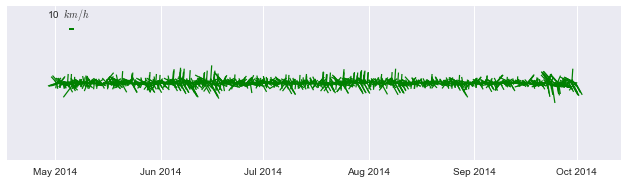

In [33]:
fig, ax = plt.subplots(figsize=(11, 2.75))

q = stick_plot(timess, uu, vv, ax=ax, width=0.002, color='green')

ref = 10
qk = ax.quiverkey(q, 0.1, 0.85, ref,
                  "%s  $km/h$" % ref,
                  labelpos='N', coordinates='axes')



In [36]:
60*24

1440